# Recon Cartographer
A script to transform a photo of a region sticker discovered through a recon action into a grayscale template that is convenient for printing. Different arrangements of supply lines can be experimented with by drawing on the printout ahead of making the decision within the game.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas
import seaborn as sns
import skimage
import skimage.color
import skimage.feature
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.transform

In [2]:
# first_recon.png was captured using an iPhone 7 Plus in a room illuminated with daylight. No flash.
path_im = "first_recon.png"

In [3]:
im = skimage.io.imread(path_im)

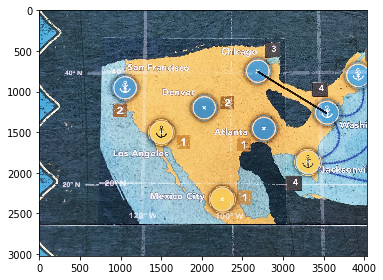

In [4]:
skimage.io.imshow(im)

# Color threshold
Convert the color or RGB image into HSV color format in order to threshold based upon color and brightness.
* Hue contains information about the color, such as a particular shade of blue or orange.
* Saturation contains information about how much background color there is. The highest level of saturation will give the purest color and there is no background. The lowest level of saturation will look white, because the color doesn't much stand out beyond any other color.
* Value contains information about the brightness of a color. Low values will be black and high values will be intense and bright.

The image is converted into a pandas dataframe for the convenience of plotting histograms with the seaborn python library.

In [5]:
im_hsv = skimage.color.rgb2hsv(im)

In [6]:
im_hsv_dict = {}

im_hsv_dict["hue"] = im_hsv[:,:,0].flatten()

im_hsv_dict["sat"] = im_hsv[:,:,1].flatten()

im_hsv_dict["val"] = im_hsv[:,:,2].flatten()

df_hsv = pandas.DataFrame.from_dict(im_hsv_dict)

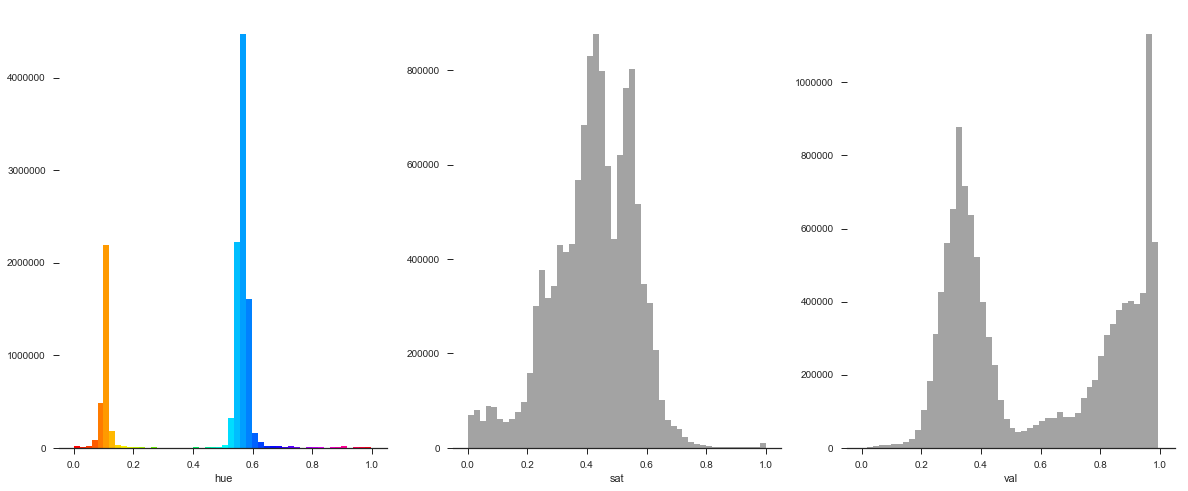

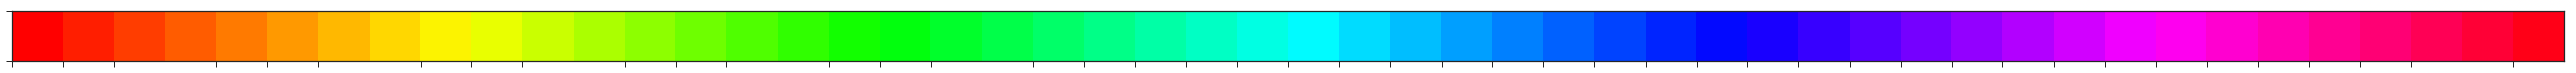

In [7]:
sns.set(style="ticks", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True)
sns.despine(left=True)
# hue
dplot_hue = sns.distplot(df_hsv["hue"], color="b", kde=False, ax=axes[0])
p_num = len(dplot_hue.patches)
cmap_hsv = plt.get_cmap("hsv", 50)
hsv_array = cmap_hsv(range(p_num))
for ind, p in enumerate(dplot_hue.patches):
    p.set_facecolor(hsv_array[ind])
    p.set_alpha(1.0)

# sat
dplot_hue = sns.distplot(df_hsv["sat"], color="k", kde=False, ax=axes[1])

# val
dplot_val = sns.distplot(df_hsv["val"], color="k", kde=False, ax=axes[2])

sns.palplot(hsv_array)

Based on the histogram of the hue, threshold the hue such that only the yellowish colors remain.

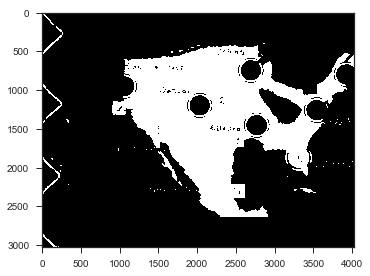

In [8]:
im2 = im_hsv[:,:,0]
im2 = im2 < 0.3
skimage.io.imshow(im2)

Add the cities back using a hough transform.

In [17]:
im_gray = skimage.color.rgb2gray(im)
im_gray_small = skimage.transform.rescale(im2,0.125)
im_edge = skimage.filters.prewitt(im_gray_small)
im_edge = skimage.morphology.dilation(im_edge)
hough_radii = np.arange(15, 40, 10)
hough_res = skimage.transform.hough_circle(im_gray_small, 20)
accums, cx, cy, radii = skimage.transform.hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

/Users/Kyle/miniconda3/envs/bioimgmin/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [18]:
radii

array([15, 15, 15])

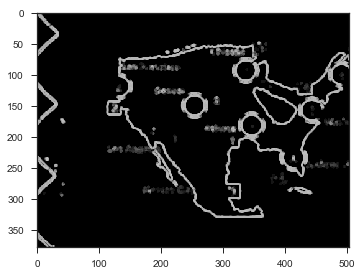

In [19]:
skimage.io.imshow(im_edge)

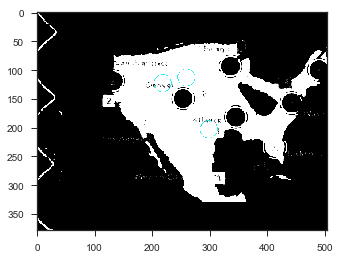

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = skimage.color.gray2rgb(im_gray_small)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = skimage.draw.circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image)
plt.show()